In [1]:
import pandas as pd

df = pd.read_csv('Carleton Players 23-24.csv')

df.head(10)

,Season,Team,Opponent,Gameid,Player,3PM,3PA,2PM,2PA,FGM,FGA,FTM,FTA,OReb,DReb,Reb,Turnover,Points,eFG
0,2023-24,Carleton,Guelph,W20231104GUECAR,Dorcas Buisa,1,2,1,4,2,6,2,4,1,4,5,5,7,0.416667
1,2023-24,Carleton,Guelph,W20231104GUECAR,Tatyanna Burke,0,0,2,5,2,5,0,0,4,4,8,1,4,0.400000
2,2023-24,Carleton,Guelph,W20231104GUECAR,Teresa Donato,2,6,0,6,2,12,0,0,2,2,4,4,6,0.250000
3,2023-24,Carleton,Guelph,W20231104GUECAR,Zerina Duvnjak,0,0,5,10,5,10,1,2,7,2,9,2,11,0.500000
4,2023-24,Carleton,Guelph,W20231104GUECAR,Hadeza Ismaila,0,0,1,1,1,1,0,0,1,3,4,0,2,1.000000
5,2023-24,Carleton,Guelph,W20231104GUECAR,Oceane Kounkou,1,2,0,0,1,2,0,0,0,0,0,0,3,0.750000
6,2023-24,Carleton,Guelph,W20231104GUECAR,Kali Pocrnic,4,6,4,10,8,16,2,2,2,0,2,2,22,0.625000
7,2023-24,Carleton,Guelph,W20231104GUECAR,Kyana-Jade Poulin,2,3,3,7,5,10,1,1,0,2,2,0,13,0.600000
8,2023-24,Carleton,Guelph,W20231104GUECAR,Jacqueline Urban,0,3,5,14,5,17,5,5,2,6,8,2,15,0.294118
9,2023-24,Carleton,Western,W20231110WESCAR,Dorcas Buisa,0,0,1,5,1,5,1,4,0,2,2,1,3,0.200000


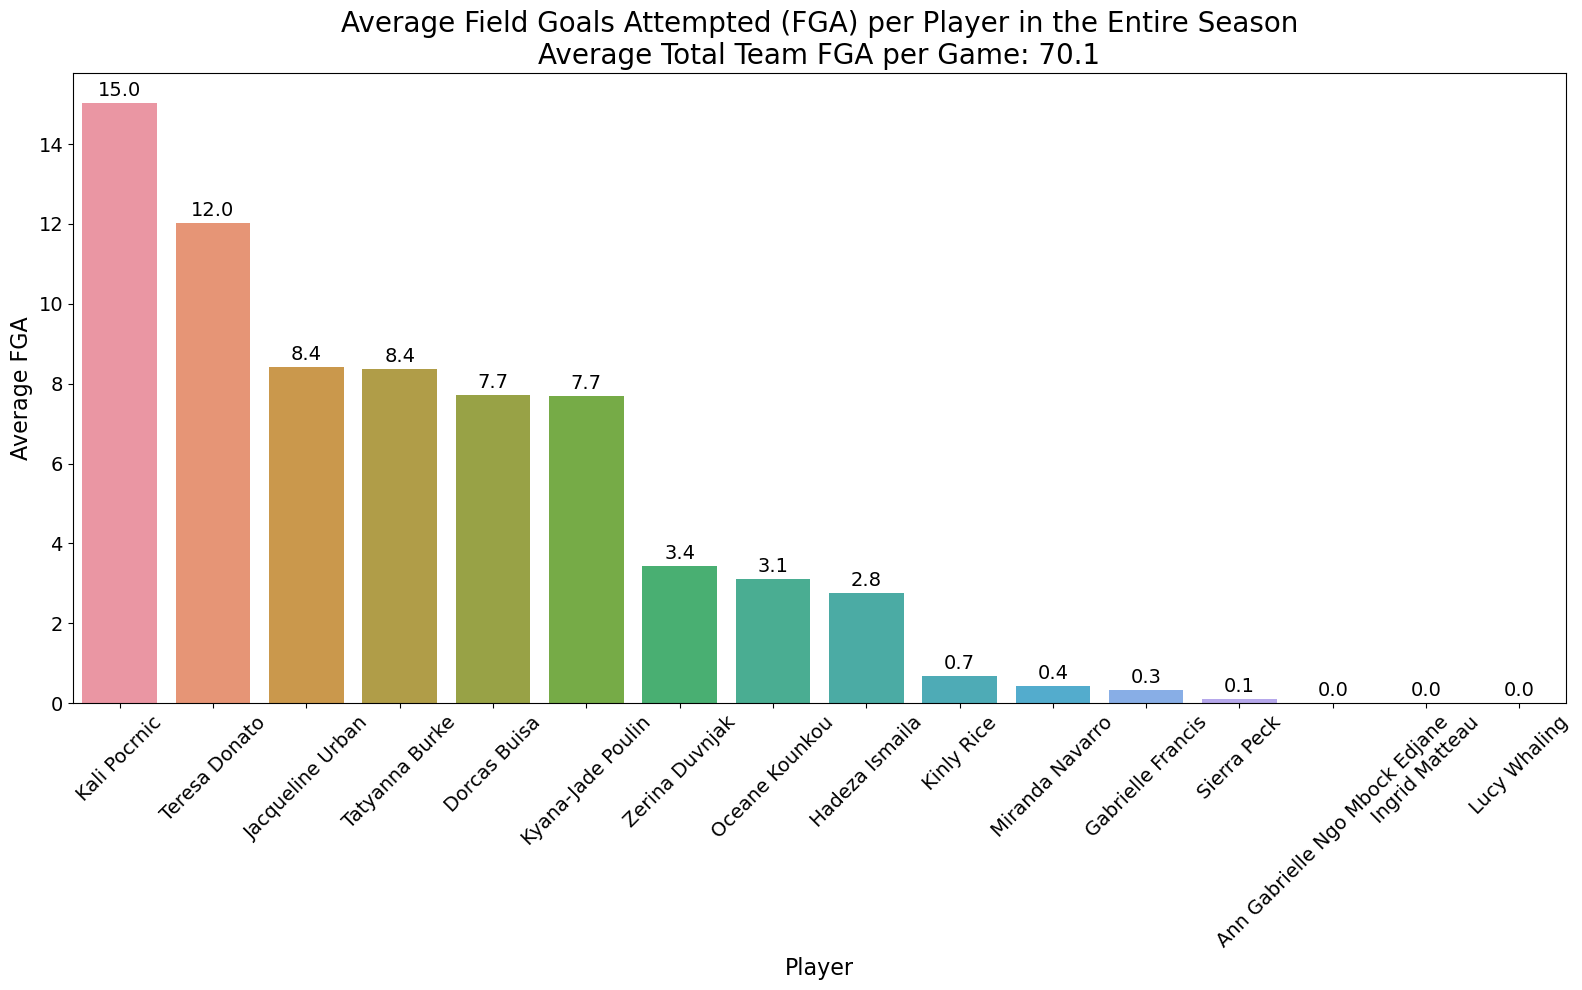

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the number of distinct games
num_games = df['Opponent'].nunique()

# Group by Player and calculate the total and average FGA per game
total_fga_per_player = df.groupby('Player')['FGA'].sum().reset_index()
total_fga_per_player['Average_FGA'] = total_fga_per_player['FGA'] / num_games

# Sort the players by the highest average FGA
total_fga_per_player = total_fga_per_player.sort_values(by='Average_FGA', ascending=False)

# Calculate the total FGA for the entire team per game
total_fga_per_game = df['FGA'].sum() / num_games

# Plotting the average Field Goals Attempted (FGA) per player
plt.figure(figsize=(16, 10))
barplot = sns.barplot(x='Player', y='Average_FGA', data=total_fga_per_player)

# Setting the title and labels with bigger font sizes
plt.title(f'Average Field Goals Attempted (FGA) per Player in the Entire Season\nAverage Total Team FGA per Game: {total_fga_per_game:.1f}', fontsize=20)
plt.xlabel('Player', fontsize=16)
plt.ylabel('Average FGA', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Annotate the values on top of the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points',
                     fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


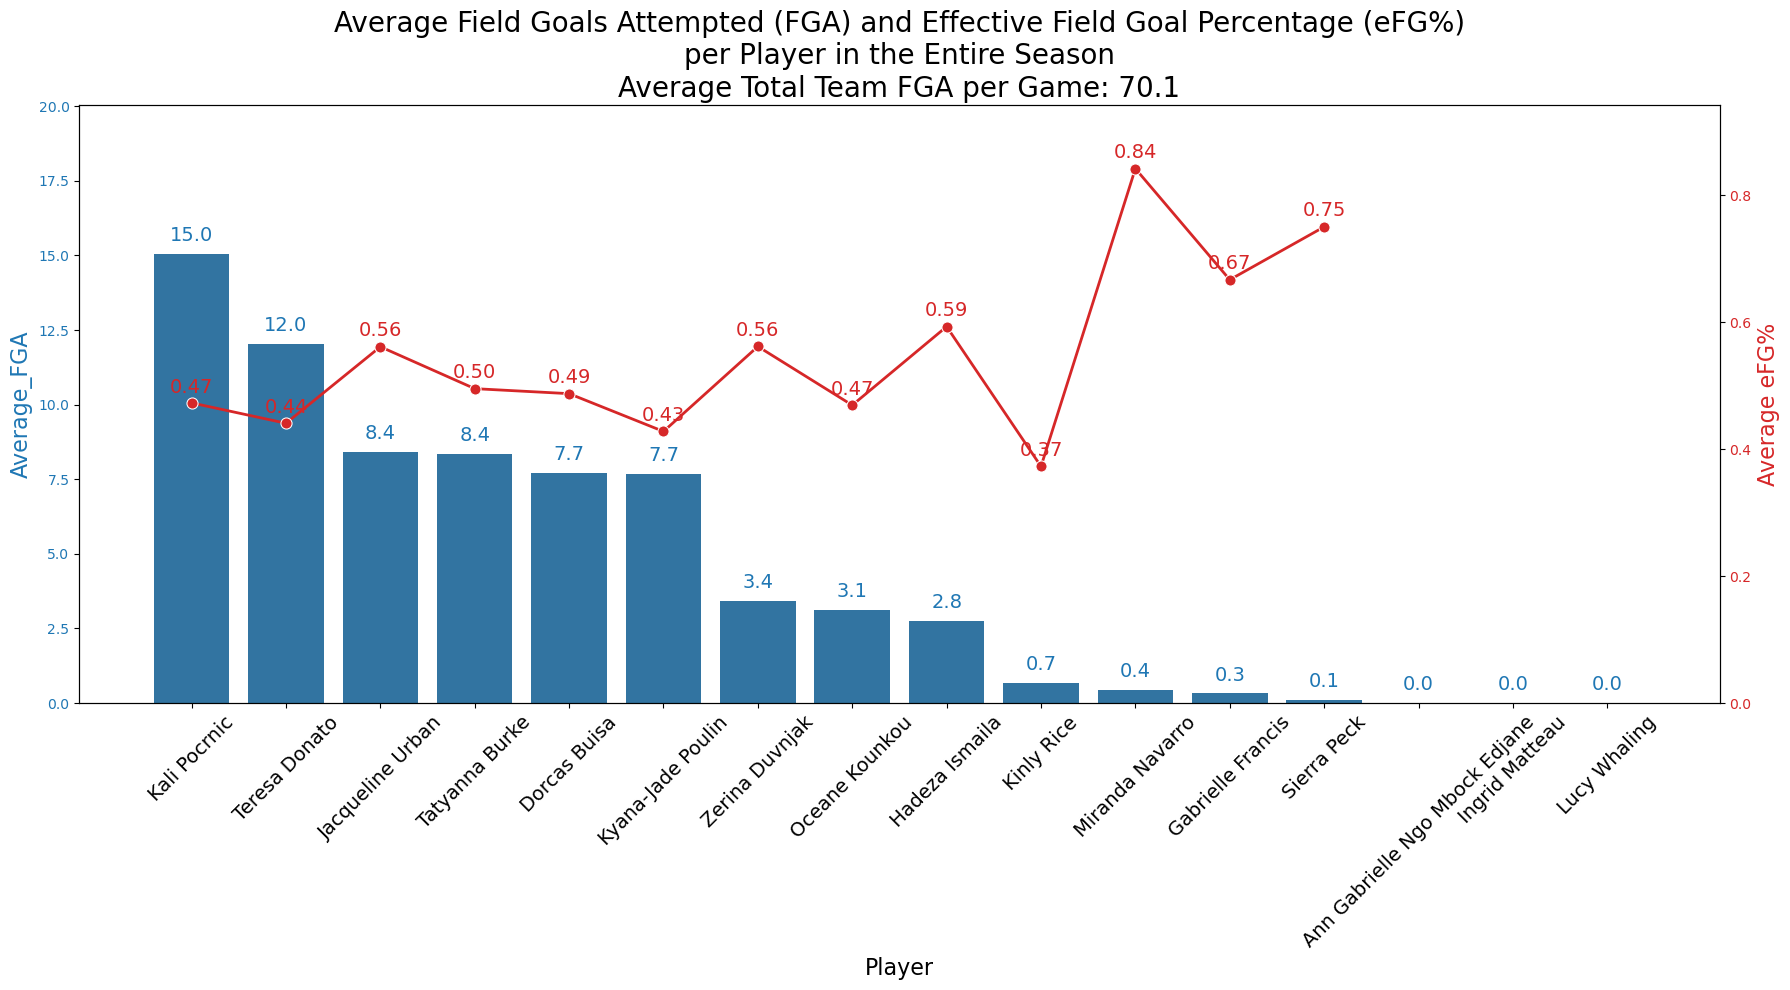

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of distinct games
num_games = df['Opponent'].nunique()

# Group by Player and calculate the total and average FGA per game
total_fga_per_player = df.groupby('Player')['FGA'].sum().reset_index()
total_fga_per_player['Average_FGA'] = total_fga_per_player['FGA'] / num_games

# Calculate the average eFG% per player
average_efg_per_player = df.groupby('Player')['eFG'].mean().reset_index()

# Merge the FGA and eFG% dataframes
player_stats = pd.merge(total_fga_per_player, average_efg_per_player, on='Player')

# Sort the players by the highest average FGA
player_stats = player_stats.sort_values(by='Average_FGA', ascending=False)

# Calculate the total FGA for the entire team per game
total_fga_per_game = df['FGA'].sum() / num_games

# Plotting the average Field Goals Attempted (FGA) and eFG% per player
fig, ax1 = plt.subplots(figsize=(18, 10))

# Bar plot for Average FGA
color = 'tab:blue'
ax1.set_xlabel('Player', fontsize=16)
ax1.set_ylabel('Average FGA', fontsize=16, color=color)
barplot = sns.barplot(x='Player', y='Average_FGA', data=player_stats, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontsize=14)
ax1.set_ylim(0, player_stats['Average_FGA'].max() + 5)  # Adjusted y-axis limit

# Annotate the values on top of the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height() + 0.3),
                     ha='center', va='bottom',
                     fontsize=14, color=color)

# Title
ax1.set_title(f'Average Field Goals Attempted (FGA) and Effective Field Goal Percentage (eFG%)\nper Player in the Entire Season\nAverage Total Team FGA per Game: {total_fga_per_game:.1f}', fontsize=20)

# Create a second y-axis for the eFG% line plot
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average eFG%', fontsize=16, color=color)
lineplot = sns.lineplot(x='Player', y='eFG', data=player_stats, ax=ax2, color=color, marker='o', linewidth=2, markersize=8)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, max(player_stats['eFG']) + 0.1)  # Increased y-axis limit

# Annotate the eFG% values on the line plot with increased vertical offset
for x, y in zip(lineplot.get_lines()[0].get_xdata(), lineplot.get_lines()[0].get_ydata()):
    ax2.text(x, y + 0.01, f'{y:.2f}', color=color, ha='center', va='bottom', fontsize=14)  # Increased offset

# Adjust layout to prevent overlap
fig.tight_layout()  
plt.show()
